In [1]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

uri = "mongodb://localhost:27017/?retryWrites=true&w=majority"
client = MongoClient(uri, server_api=ServerApi('1'))
database = client["OpenAlexEnvironmental"]
collection = database["journals"]

print(f"Total number of Articles: {collection.count_documents({})}")

Total number of Articles: 1024395


In [2]:
collection.find_one()

{'_id': ObjectId('64b7436b3edda9a6dab014da'),
 'title': 'Triclosan exposure, transformation, and human health effects',
 'language': 'en',
 'publication_year': 2017,
 'publication_date': '2017-11-17',
 'type': 'journal-article',
 'primary_location': {'is_oa': False,
  'landing_page_url': 'https://doi.org/10.1080/10937404.2017.1399306',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S96923654',
   'display_name': 'Journal of Toxicology and Environmental Health-part B-critical Reviews',
   'issn_l': '1093-7404',
   'issn': ['1521-6950', '1093-7404'],
   'is_oa': False,
   'is_in_doaj': False,
   'host_organization': 'https://openalex.org/P4310320547',
   'host_organization_name': 'Taylor & Francis',
   'host_organization_lineage': ['https://openalex.org/P4310320547'],
   'host_organization_lineage_names': ['Taylor & Francis'],
   'type': 'journal'},
  'license': None,
  'version': None},
 'authorships': [{'author_position': 'first',
   'author': {'id': 'https://openalex.org/

In [3]:
publications_data_list=[]
c=0
for x in collection.find():
    if(len(x['authorships'])>0):
        for aut in x['authorships']:
            if(aut['author_position']=='first' and len(aut['institutions'])>0 and ('country_code' in aut['institutions'][0].keys())):
                first_author_ctrycode=aut['institutions'][0]['country_code']
    if(len(x['authorships'])>0):
        for aut in x['authorships']:
            if(aut['author_position']=='last' and len(aut['institutions'])>0 and ('country_code' in aut['institutions'][0].keys())):
                last_author_ctrycode=aut['institutions'][0]['country_code']
    if(c%10000==0):
        print(c, end="--")
    c=c+1
    publications_data_list.append((x['_id'],x['publication_year'],x['type'],first_author_ctrycode, last_author_ctrycode)) 
                
     

0--10000--20000--30000--40000--50000--60000--70000--80000--90000--100000--110000--120000--130000--140000--150000--160000--170000--180000--190000--200000--210000--220000--230000--240000--250000--260000--270000--280000--290000--300000--310000--320000--330000--340000--350000--360000--370000--380000--390000--400000--410000--420000--430000--440000--450000--460000--470000--480000--490000--500000--510000--520000--530000--540000--550000--560000--570000--580000--590000--600000--610000--620000--630000--640000--650000--660000--670000--680000--690000--700000--710000--720000--730000--740000--750000--760000--770000--780000--790000--800000--810000--820000--830000--840000--850000--860000--870000--880000--890000--900000--910000--920000--930000--940000--950000--960000--970000--980000--990000--1000000--1010000--1020000--

In [5]:
publications_data_list[0]

(ObjectId('64b7436b3edda9a6dab014da'), 2017, 'journal-article', 'US', 'US')

In [6]:
import pandas as pd
publications_df = pd.DataFrame(publications_data_list, columns =['id', 'year', 'type','first_aut_cc','last_aut_cc'])
publications_df.head()

,id,year,type,first_aut_cc,last_aut_cc
0,64b7436b3edda9a6dab014da,2017,journal-article,US,US
1,64b7436b3edda9a6dab014db,2018,journal-article,DK,DK
2,64b7436b3edda9a6dab014dc,2013,journal-article,DK,DK
3,64b7436b3edda9a6dab014dd,2014,journal-article,GB,GB
4,64b7436b3edda9a6dab014de,2013,journal-article,US,US


In [7]:
firstauthor_pub_cnt=publications_df.loc[:, ['first_aut_cc','id']].groupby('first_aut_cc').count()
lastauthor_pub_cnt=publications_df.loc[:, ['last_aut_cc','id']].groupby('last_aut_cc').count()

In [8]:
firstauthor_pub_cnt.shape

(197, 1)

In [9]:
lastauthor_pub_cnt.shape

(205, 1)

In [10]:
from iso3166 import countries
first_aut_ctry = []
last_aut_ctry=[]
first_aut_cc3 = []
last_aut_cc3=[]
c=0
for idx in firstauthor_pub_cnt.index:
    if(idx is not None):
        first_aut_ctry.append(countries.get(idx).name)
        #print(countries.get(idx).name)
        first_aut_cc3.append(countries.get(idx).alpha3)
    else:
        first_aut_ctry.append(None)
        first_aut_cc3.append(None)

for idx in lastauthor_pub_cnt.index:
    if(idx is not None):
        last_aut_ctry.append(countries.get(idx).name)
        last_aut_cc3.append(countries.get(idx).alpha3)
    else:
        last_aut_ctry.append(None)
        last_aut_cc3.append(None)
    

In [11]:
firstauthor_pub_cnt['Country']=first_aut_ctry
firstauthor_pub_cnt['Country Code']=first_aut_cc3
lastauthor_pub_cnt['Country']=last_aut_ctry
lastauthor_pub_cnt['Country Code']=last_aut_cc3


In [12]:
lastauthor_pub_cnt=lastauthor_pub_cnt.rename(columns={'id':'Articles Count'})
lastauthor_pub_cnt.head()

,Articles Count,Country,Country Code
last_aut_cc,,,
AD,7,Andorra,AND
AE,1100,United Arab Emirates,ARE
AF,21,Afghanistan,AFG
AL,63,Albania,ALB
AM,90,Armenia,ARM


In [13]:
firstauthor_pub_cnt=firstauthor_pub_cnt.rename(columns={'id':'Articles Count'})
firstauthor_pub_cnt.head()


,Articles Count,Country,Country Code
first_aut_cc,,,
AD,1,Andorra,AND
AE,1049,United Arab Emirates,ARE
AF,24,Afghanistan,AFG
AL,90,Albania,ALB
AM,108,Armenia,ARM


In [14]:
income_level_data=pd.read_excel('world bank income division.xlsx')
income_level_data2=pd.read_excel('world bank income2.xlsx')
gdp_data=pd.read_excel('world bank GDP data.xls')


In [15]:
income_level_data=income_level_data.drop(columns={'Income Group Code','Income Group'})
income_level_data=income_level_data.drop_duplicates()

In [16]:
income_level_data.head()

,Country Code,Country
0,ASM,American Samoa
1,AND,Andorra
2,ATG,Antigua and Barbuda
3,ABW,Aruba
4,AUS,Australia


In [17]:

income_level_data2.head()

,Economy,Income group
0,Aruba,High income
1,Afghanistan,Low income
2,Angola,Lower middle income
3,Albania,Upper middle income
4,Andorra,High income


In [18]:
income_level_data2.shape

(218, 2)

In [19]:
income_level_data.shape

(217, 2)

In [20]:
income_level_data=income_level_data.merge(income_level_data2, right_on='Economy', left_on='Country')
income_level_data=income_level_data.drop(columns={'Economy'})

In [21]:
income_level_data.head()

,Country Code,Country,Income group
0,ASM,American Samoa,High income
1,AND,Andorra,High income
2,ATG,Antigua and Barbuda,High income
3,ABW,Aruba,High income
4,AUS,Australia,High income


In [22]:
gdp_data=gdp_data.drop(columns={'Indicator Name'})
gdp_data=gdp_data.rename(columns={'2022':'GDP per capita(US$)'})
gdp_data=gdp_data.drop_duplicates()
gdp_data.head()

,Country Name,Country Code,GDP per capita(US$)
0,Aruba,ABW,29342.100730
1,Africa Eastern and Southern,AFE,1622.391720
2,Afghanistan,AFG,363.674087
3,Africa Western and Central,AFW,1790.348800
4,Angola,AGO,2998.501158


In [23]:
first_author_data=firstauthor_pub_cnt.merge(income_level_data, on='Country Code',how='left', suffixes=('_pub','_inc'))
first_author_data=first_author_data.merge(gdp_data, on='Country Code', how='left')
first_author_data.head()

,Articles Count,Country_pub,Country Code,Country_inc,Income group,Country Name,GDP per capita(US$)
0,1,Andorra,AND,Andorra,High income,Andorra,41992.793358
1,1049,United Arab Emirates,ARE,United Arab Emirates,High income,United Arab Emirates,53757.863251
2,24,Afghanistan,AFG,Afghanistan,Low income,Afghanistan,363.674087
3,90,Albania,ALB,Albania,Upper middle income,Albania,6802.804519
4,108,Armenia,ARM,Armenia,Upper middle income,Armenia,7014.206592


In [24]:
last_author_data=lastauthor_pub_cnt.merge(income_level_data, on='Country Code',how='left', suffixes=('_pub','_inc'))
last_author_data=last_author_data.merge(gdp_data, on='Country Code', how='left')
last_author_data.head()

,Articles Count,Country_pub,Country Code,Country_inc,Income group,Country Name,GDP per capita(US$)
0,7,Andorra,AND,Andorra,High income,Andorra,41992.793358
1,1100,United Arab Emirates,ARE,United Arab Emirates,High income,United Arab Emirates,53757.863251
2,21,Afghanistan,AFG,Afghanistan,Low income,Afghanistan,363.674087
3,63,Albania,ALB,Albania,Upper middle income,Albania,6802.804519
4,90,Armenia,ARM,Armenia,Upper middle income,Armenia,7014.206592


In [25]:
first_author_data=first_author_data.sort_values(by=['Articles Count'], ascending=False)
last_author_data=last_author_data.sort_values(by=['Articles Count'], ascending=False)

In [26]:
first_author_data.head()


,Articles Count,Country_pub,Country Code,Country_inc,Income group,Country Name,GDP per capita(US$)
36,276703,China,CHN,China,Upper middle income,China,12720.215640
184,127527,United States of America,USA,United States,High income,United States,76398.591742
80,39469,India,IND,India,Lower middle income,India,2388.621198
53,31149,Spain,ESP,Spain,High income,Spain,29350.168521
61,30720,United Kingdom of Great Britain and Northern I...,GBR,United Kingdom,High income,United Kingdom,45850.426122


In [27]:
last_author_data.head()

,Articles Count,Country_pub,Country Code,Country_inc,Income group,Country Name,GDP per capita(US$)
36,261895,China,CHN,China,Upper middle income,China,12720.215640
191,132677,United States of America,USA,United States,High income,United States,76398.591742
83,38635,India,IND,India,Lower middle income,India,2388.621198
53,33032,Spain,ESP,Spain,High income,Spain,29350.168521
62,32439,United Kingdom of Great Britain and Northern I...,GBR,United Kingdom,High income,United Kingdom,45850.426122


In [37]:
print(first_author_data.shape)
print(last_author_data.shape)
first_author_data.to_excel("First_author_ctry_corresponding_data.xlsx")
last_author_data.to_excel("Last_author_ctry_corresponding_data.xlsx")

(197, 7)
(205, 7)


In [34]:
print("First author country Null Income levels", first_author_data['Income group'].isna().sum())
print("First author country Null  GDP per capita", first_author_data['GDP per capita(US$)'].isna().sum())
print("Last author country Null Income levels", last_author_data['Income group'].isna().sum())
print("Last author country Null  GDP per capita", last_author_data['GDP per capita(US$)'].isna().sum())

First author country Null Income levels 8
First author country Null  GDP per capita 11
Last author country Null Income levels 9
Last author country Null  GDP per capita 13


In [35]:
first_author_ctry_data=first_author_data.dropna(axis=0, subset=['Income group', 'GDP per capita(US$)'])
last_author_ctry_data=last_author_data.dropna(axis=0, subset=['Income group','GDP per capita(US$)'])

In [36]:
print(first_author_ctry_data.shape)
print(last_author_ctry_data.shape)

(185, 7)
(191, 7)


# Visualization-1 (First Author Country with Corresponding Income level)

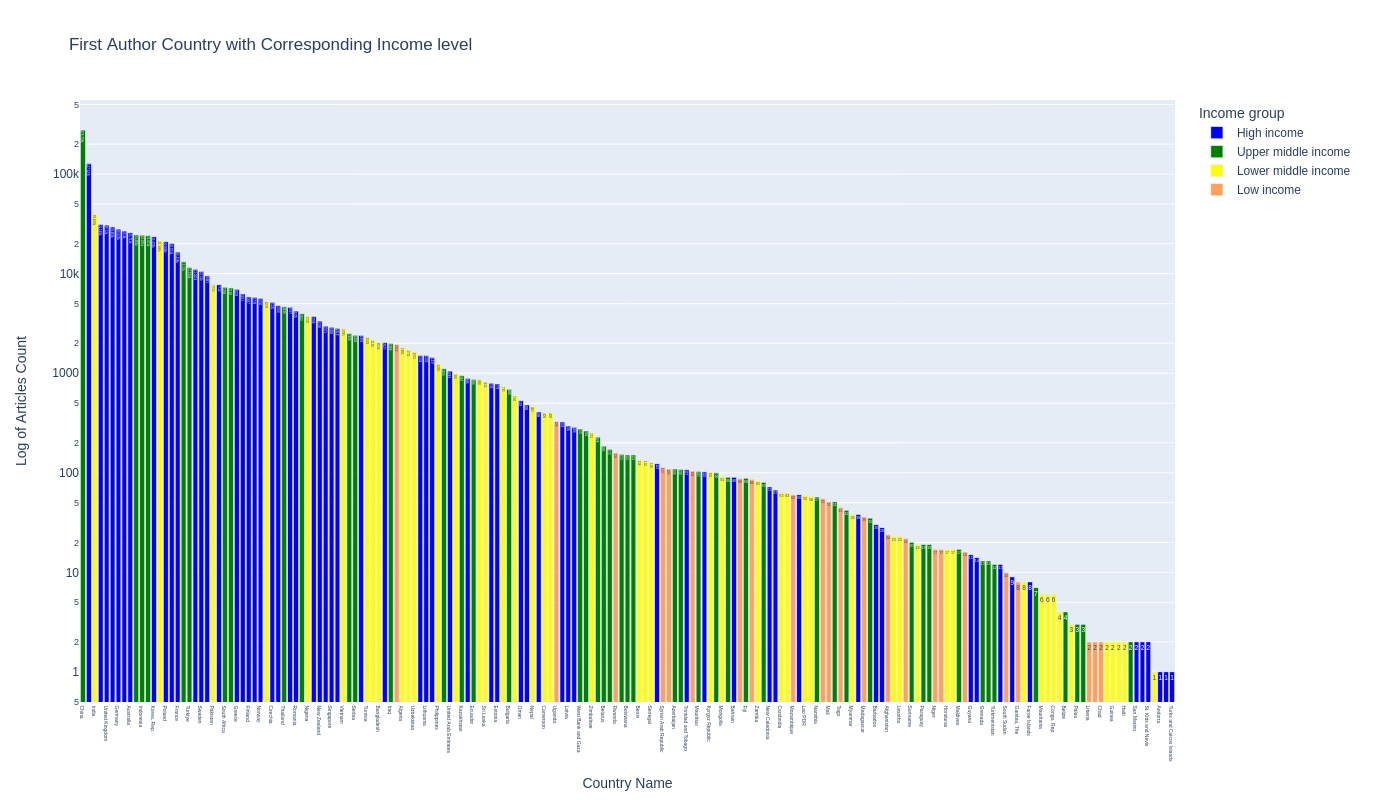

In [52]:
import plotly.express as px
fig=px.bar(first_author_ctry_data, x='Country Name', y='Articles Count', color='Income group', log_y=True, color_discrete_map={
                'High income': 'blue',
                'Upper middle income' : 'green',
                'Lower middle income': 'yellow',
                'Low Income' : 'red'},
            labels={"Articles Count": "Log of Articles Count"},
           title='First Author Country with Corresponding Income level',
               category_orders={'Income group':['High income', 'Upper middle income', 'Lower middle income','Low Income']}, width=1500, height=800, text_auto=True)
fig.update_layout(xaxis_categoryorder = 'total descending')
fig.update_layout(
xaxis = dict(
tickfont = dict(size=5)))
fig.update_traces(cliponaxis=False)
'''
fig.update_layout(color_discrete_map={
                'High income': 'blue',
                'Upper middle income' : 'green',
                'Lower middle income': 'yellow',
                'Low Income' : 'red'})
'''
#fig.write_html("/Users/prathimagodha/Desktop/plot1.html")
fig.show()

In [55]:
first_aut_ctry_Income_grp=first_author_ctry_data.loc[:, ['Income group','Articles Count']].groupby('Income group').sum()
first_aut_ctry_Income_grp=first_aut_ctry_Income_grp.sort_values(by='Articles Count', ascending=False)

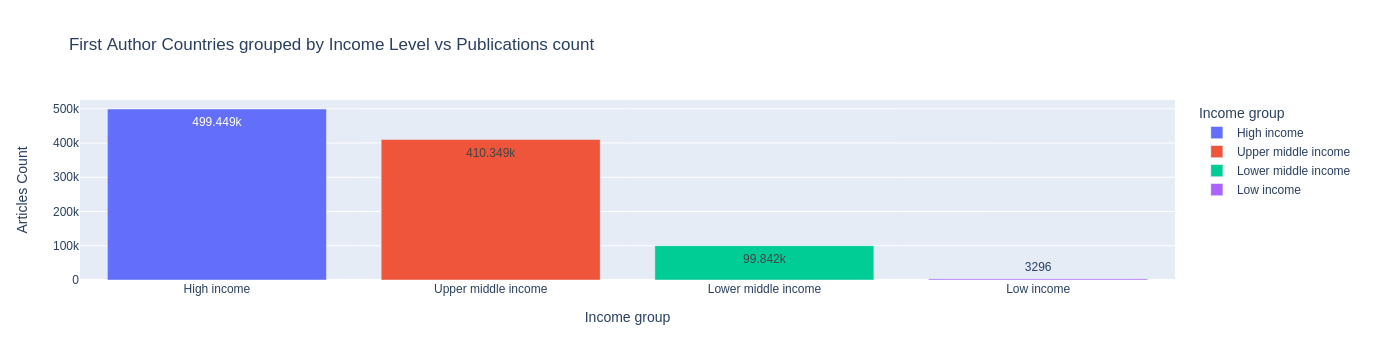

In [56]:
fig=px.bar(first_aut_ctry_Income_grp, x=first_aut_ctry_Income_grp.index, y='Articles Count', color=first_aut_ctry_Income_grp.index, text_auto=True,
           title='First Author Countries grouped by Income Level vs Publications count',)
fig.show()

# Visualization-2 (Last Author Country with Corresponding Income level)

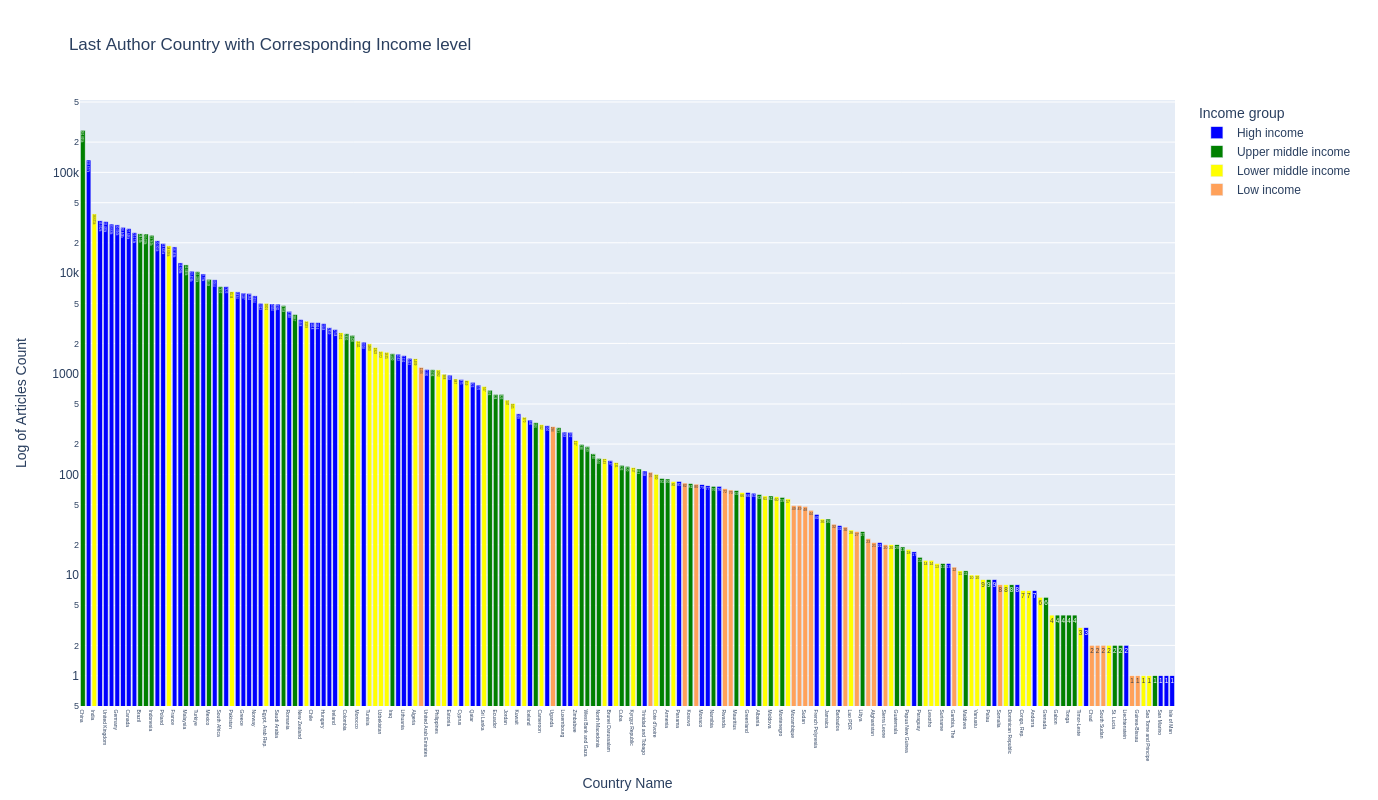

In [53]:
import plotly.express as px
fig=px.bar(last_author_ctry_data, x='Country Name', y='Articles Count', color='Income group', log_y=True, color_discrete_map={
                'High income': 'blue',
                'Upper middle income' : 'green',
                'Lower middle income': 'yellow',
                'Low Income' : 'red'},
           labels={"Articles Count": "Log of Articles Count"},
           title='Last Author Country with Corresponding Income level',
               category_orders={'Income group':['High income', 'Upper middle income', 'Lower middle income','Low Income']}, width=1500, height=800, text_auto=True)
fig.update_layout(xaxis_categoryorder = 'total descending')
fig.update_layout(
xaxis = dict(
tickfont = dict(size=5)))
fig.update_traces(cliponaxis=False)
'''
fig.update_layout(color_discrete_map={
                'High income': 'blue',
                'Upper middle income' : 'green',
                'Lower middle income': 'yellow',
                'Low Income' : 'red'})
'''
#fig.write_html("/Users/prathimagodha/Desktop/plot1.html")
fig.show()

In [57]:
last_aut_ctry_Income_grp=last_author_ctry_data.loc[:, ['Income group','Articles Count']].groupby('Income group').sum()
last_aut_ctry_Income_grp=last_aut_ctry_Income_grp.sort_values(by='Articles Count', ascending=False)

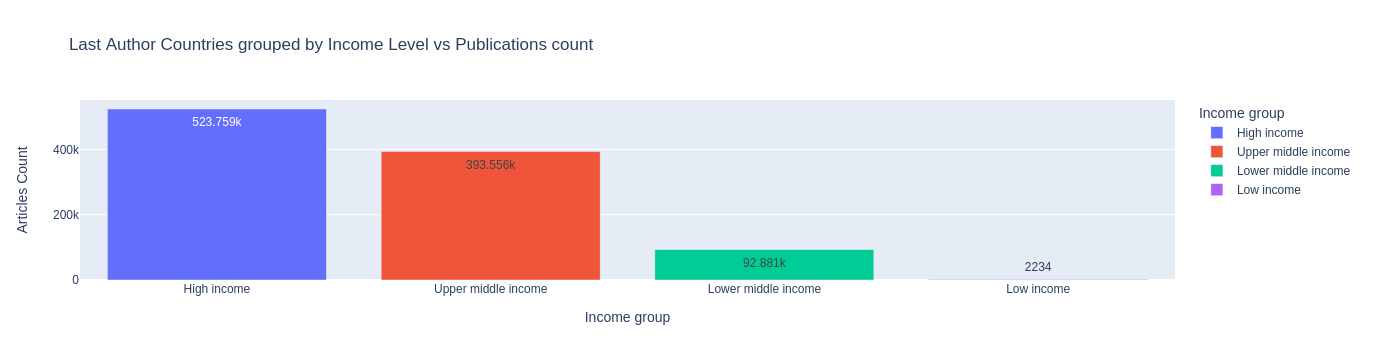

In [58]:
fig=px.bar(last_aut_ctry_Income_grp, x=last_aut_ctry_Income_grp.index, y='Articles Count', color=last_aut_ctry_Income_grp.index, text_auto=True,
           title='Last Author Countries grouped by Income Level vs Publications count',)
fig.show()